In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('bank.csv')

In [3]:
df.sample(5)

,target,text
100,0,Phone pe
24,0,Vote for the best marching contingent and tabl...
564,0,REG
568,0,"Dear Customer, Request to link mobile no. XXXX..."
673,1,"Dear SBI User, your A/c X5121-debited by Rs5.0..."


In [4]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [5]:
# check for duplicate values
df.duplicated().sum()

48

In [6]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [7]:
df.duplicated().sum()

0

In [8]:
df.shape

(751, 2)

In [9]:
df.head()

,target,text
0,0,Insurance Agent ya Contract Killer? Janiye Bob...
1,0,50% ALERT: for your daily Data usage. Recharge...
2,0,"Dear Gaana User, purchase of your subscription..."
3,0,Balance for Jio Number 9834812916: 1) Rs 299-1...
4,0,Balance for Jio Number 9834812916: 1) Rs 299-1...


In [10]:
df['target'].value_counts()

0    531
1    220
Name: target, dtype: int64

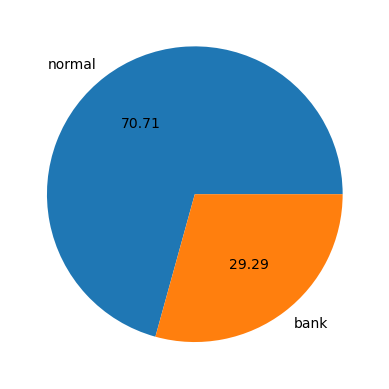

In [11]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['normal','bank'],autopct="%0.2f")
plt.show()

In [12]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [13]:
X = tfidf.fit_transform(df['text']).toarray()

In [14]:
y = df['target'].values

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [17]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [18]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [19]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9602649006622517
[[102   4]
 [  2  43]]
0.9148936170212766


In [20]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9801324503311258
[[103   3]
 [  0  45]]
0.9375


In [21]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9801324503311258
[[103   3]
 [  0  45]]
0.9375


In [22]:
import pickle
pickle.dump(bnb,open('model.pkl','wb'))
pickle.dump(tfidf,open('vectorizer.pkl','wb'))